# Data Analysis Intern at Cognifyz Technologies

## Level 3

## Task 1 : Restaurant Reviews

## Analyze the text reviews to identify the most common positive and negative keywords.

In [5]:
import pandas as pd
df = pd.read_csv("Dataset .csv")
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [6]:
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('opinion_lexicon')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\gowth\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Most common positive words: [('good', 3179), ('excellent', 301)]
Most common negative words: [('poor', 186)]


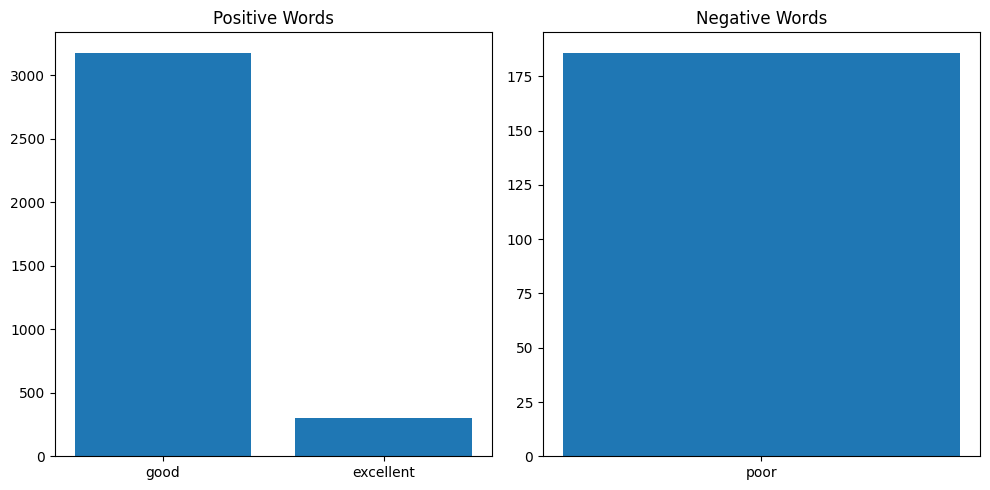

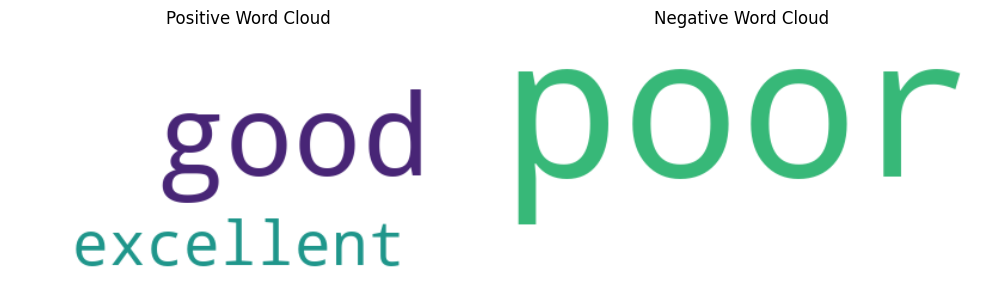

In [7]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, opinion_lexicon
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

df['Processed Review'] = df['Rating text'].apply(preprocess_text)

positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

all_pos_words = []
all_neg_words = []

for words in df['Processed Review']:
    for word in words:
        if word in positive_words:
            all_pos_words.append(word)
        elif word in negative_words:
            all_neg_words.append(word)


pos_word_freq = Counter(all_pos_words)
neg_word_freq = Counter(all_neg_words)

print("Most common positive words:", pos_word_freq.most_common(5))
print("Most common negative words:", neg_word_freq.most_common(5))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(*zip(*pos_word_freq.most_common(5)))
plt.title('Positive Words')

plt.subplot(1, 2, 2)
plt.bar(*zip(*neg_word_freq.most_common(5)))
plt.title('Negative Words')

plt.tight_layout()
plt.show()

pos_wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(pos_word_freq)
neg_wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(neg_word_freq)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Word Cloud')

plt.tight_layout()
plt.show()

In [8]:
df["Rating text"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

### Calculate the average length of reviews and explore if there is a relationship between review length and rating.

Average review length: 7.02 characters


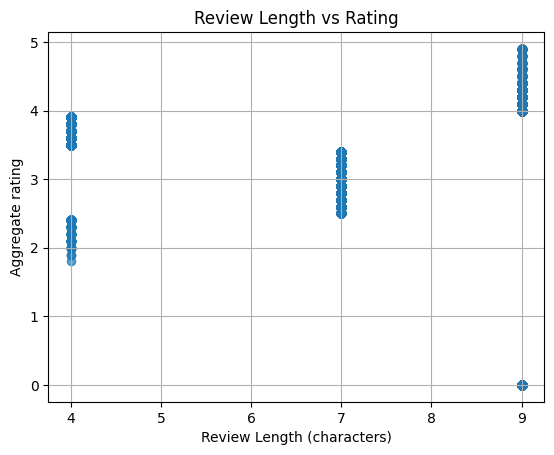

Correlation between review length and rating: -0.48


In [10]:
df['Review Length'] = df['Rating text'].apply(len)

average_review_length = df['Review Length'].mean()
print(f"Average review length: {average_review_length:.2f} characters")

plt.scatter(df['Review Length'], df['Aggregate rating'], alpha=0.7)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Aggregate rating')
plt.grid(True)
plt.show()

correlation = df['Review Length'].corr(df['Aggregate rating'])
print(f"Correlation between review length and rating: {correlation:.2f}")

## Task 2 : Votes Analysis

### Identify the restaurants with the highest and lowest number of votes.

In [13]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Processed Review,Review Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,[excellent],9
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,[excellent],9
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,[good],9


In [14]:
highest_votes_restaurant = df.loc[df['Votes'].idxmax()]
lowest_votes_restaurant = df.loc[df['Votes'].idxmin()]

print("Restaurant with the highest number of votes:")
print(highest_votes_restaurant)

print("\nRestaurant with the lowest number of votes:")
print(lowest_votes_restaurant)


Restaurant with the highest number of votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

Correlation between Votes and Rating: 0.31


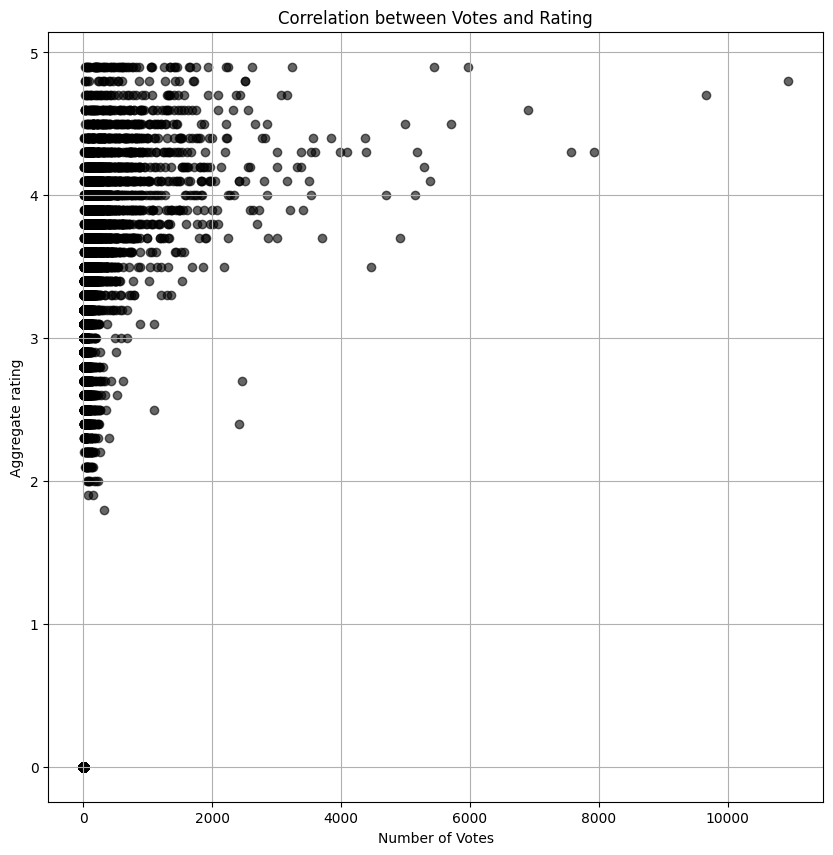

In [16]:
correlation = df['Votes'].corr(df['Aggregate rating'])

print(f"Correlation between Votes and Rating: {correlation:.2f}")

plt.figure(figsize=(10, 10))
plt.scatter(df['Votes'], df['Aggregate rating'], color='Black', alpha=0.6)
plt.title('Correlation between Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate rating')
plt.grid(True)
plt.show()


## Task 3 : Price Range vs. Online Delivery and Table Booking

### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [19]:
A_df = pd.read_csv("Dataset .csv")

A_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [20]:
A_df['Has Online delivery']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Has Online delivery, Length: 9551, dtype: object

In [21]:
A_df['Has Table booking']

0       Yes
1       Yes
2       Yes
3        No
4       Yes
       ... 
9546     No
9547     No
9548     No
9549     No
9550     No
Name: Has Table booking, Length: 9551, dtype: object

   Price range  Has Online delivery  Has Table booking
0            1            15.774077           0.022502
1            2            41.310633           7.677482
2            3            29.190341          45.738636
3            4             9.044369          46.757679


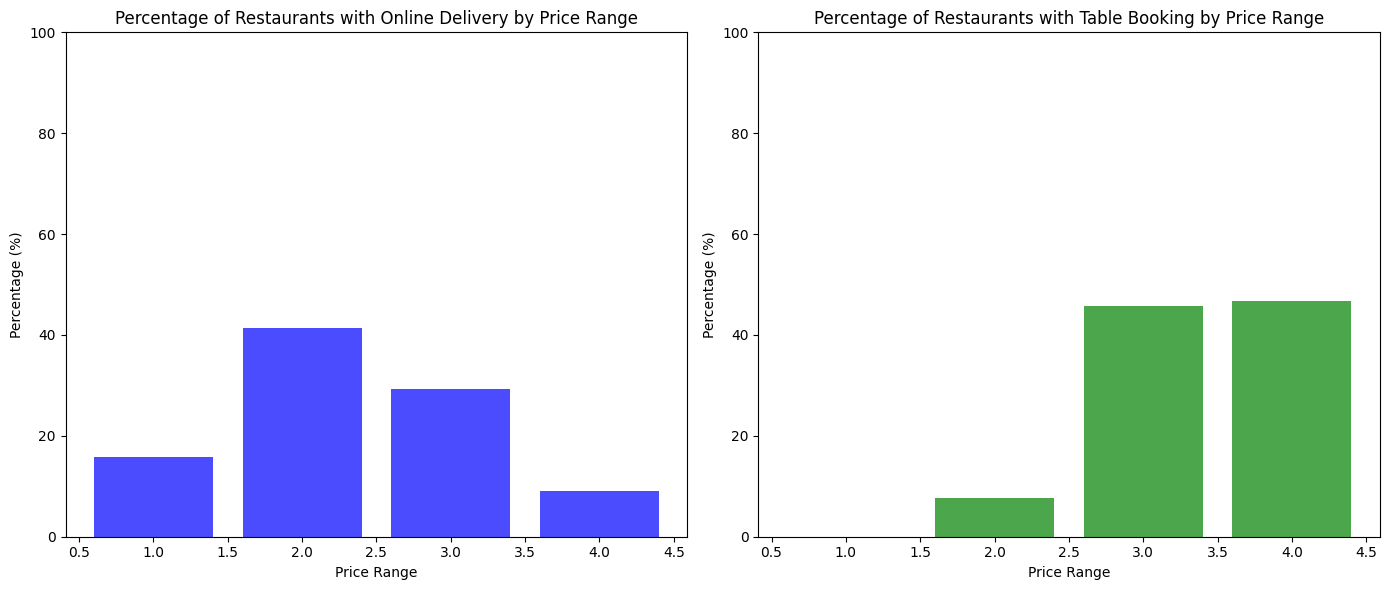

In [22]:
A_df['Has Online delivery'] = A_df['Has Online delivery'].map({'Yes': True, 'No': False})
A_df['Has Table booking'] = A_df['Has Table booking'].map({'Yes': True, 'No': False})

price_group = A_df.groupby('Price range').agg({
    'Has Online delivery': 'mean',
    'Has Table booking': 'mean'
}).reset_index()

price_group['Has Online delivery'] = price_group['Has Online delivery'] * 100
price_group['Has Table booking'] = price_group['Has Table booking'] * 100

print(price_group)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(price_group['Price range'], price_group['Has Online delivery'], color='blue', alpha=0.7)
plt.title('Percentage of Restaurants with Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.bar(price_group['Price range'], price_group['Has Table booking'], color='green', alpha=0.7)
plt.title('Percentage of Restaurants with Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


### Determine if higher-priced restaurants are more likely to offer these services.

Average percentage of online delivery in higher-priced restaurants: 19.12%
Average percentage of table booking in higher-priced restaurants: 46.25%
Average percentage of online delivery in lower-priced restaurants: 28.54%
Average percentage of table booking in lower-priced restaurants: 3.85%


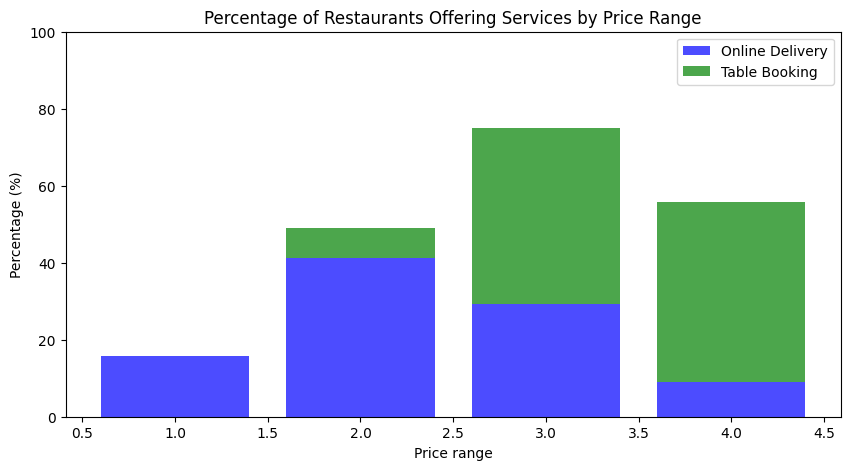

In [24]:
higher_price_ranges = price_group[price_group['Price range'] >= 3]  # Assuming price range 3 and 4 are higher
lower_price_ranges = price_group[price_group['Price range'] < 3]   # Assuming price range 1 and 2 are lower

avg_online_delivery_high = higher_price_ranges['Has Online delivery'].mean()
avg_table_booking_high = higher_price_ranges['Has Table booking'].mean()

avg_online_delivery_low = lower_price_ranges['Has Online delivery'].mean()
avg_table_booking_low = lower_price_ranges['Has Table booking'].mean()

print(f"Average percentage of online delivery in higher-priced restaurants: {avg_online_delivery_high:.2f}%")
print(f"Average percentage of table booking in higher-priced restaurants: {avg_table_booking_high:.2f}%")
print(f"Average percentage of online delivery in lower-priced restaurants: {avg_online_delivery_low:.2f}%")
print(f"Average percentage of table booking in lower-priced restaurants: {avg_table_booking_low:.2f}%")

plt.figure(figsize=(10, 5))

plt.bar(price_group['Price range'], price_group['Has Online delivery'], color='blue', alpha=0.7, label='Online Delivery')
plt.bar(price_group['Price range'], price_group['Has Table booking'], color='green', alpha=0.7, label='Table Booking', bottom=price_group['Has Online delivery'])

plt.title('Percentage of Restaurants Offering Services by Price Range')
plt.xlabel('Price range')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()

plt.show()


####
### GOWTHAM G.S PATIL
### SHRIDEVI INSTITUTE OF ENGINEERING AND TECHNOLOGY (SIET), TUMKURU
### COMPUTER SCIENCE ENGINEERING